# Описание

Алгоритмы кредитного скоринга используются банками для определения необходимости предоставления кредита.

Целью этого проекта является создание модели, которую кредиторы смогут использовать для принятия финансовых решений. Для обучения моделей, предсказывающих вероятности того, что кто-то испытает финансовые затруднения в ближайшие два года, используется датасет с соревнования Kaggle "Give Me Some Credit".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Данные



| variable name                        | description                                                                                                                                               | type       |
|--------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                                                                  | Y/N        |
| age                                  | Age of borrower in years                                                                                                                                  | integer    |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except  real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse  in the last 2 years.                                                                  | integer    |
| DebtRatio                            | Monthly debt payments, alimony,living costs divided by monthy gross income                                                                                | percentage |
| MonthlyIncome                        | Monthly Income                                                                                                                                            | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and  Lines of credit (e.g. credit cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due                                                                                                | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                                                            | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                   | integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                               | integer    |   |   |   |   |   |   |

### Обзор данных

In [120]:
data = pd.read_csv('GiveMeSomeCredit.csv')
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
data.duplicated().sum()

0

#### Некоторые выводы
* Колонка "Unnamed:0" содержит порядковый номер и не несет смысла для построения моделей
* В колонках "MonthlyIncome" и "NumberOfDependents" есть пропущенные значения
* Типы данных колонок корректны
* В данных отсутствуют повторяющиеся строки

## Исследовательский анализ данных

### RevolvingUtilizationOfUnsecuredLines

In [6]:
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

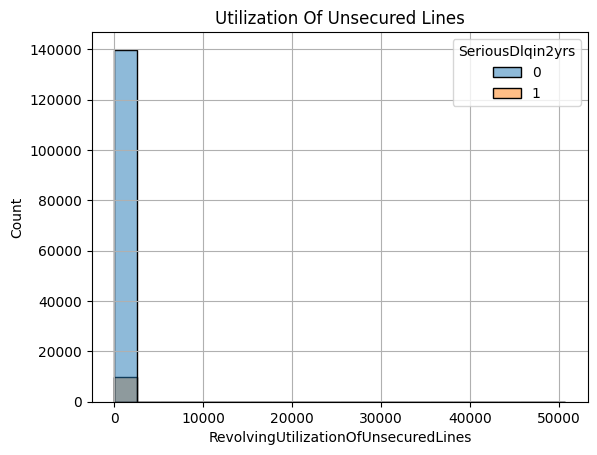

In [7]:
sns.histplot(data=data, x='RevolvingUtilizationOfUnsecuredLines', hue='SeriousDlqin2yrs', bins=20)
plt.grid()
plt.title('Utilization Of Unsecured Lines')
plt.show()

In [8]:
data[data['RevolvingUtilizationOfUnsecuredLines'] > 1].shape

(3321, 12)

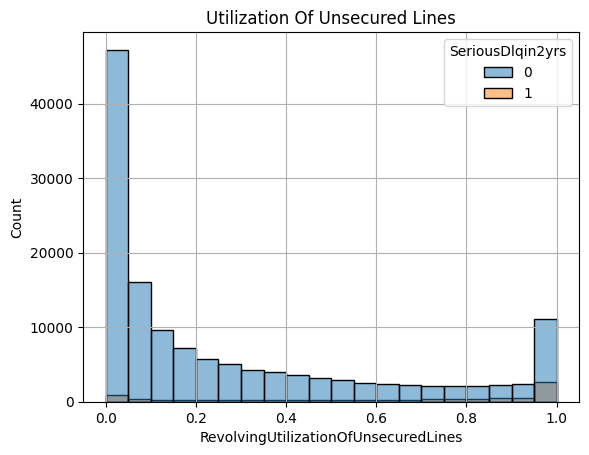

In [9]:
sns.histplot(data=data[data['RevolvingUtilizationOfUnsecuredLines'] < 1], x='RevolvingUtilizationOfUnsecuredLines', hue='SeriousDlqin2yrs', bins=20)
plt.grid()
plt.title('Utilization Of Unsecured Lines')
plt.show()

* Учитывая, что больше 75% значений признака меньше 1, а максимальное значение - 50708, можно рассматривать часть слишком больших значений как выбросы.
   

### Age

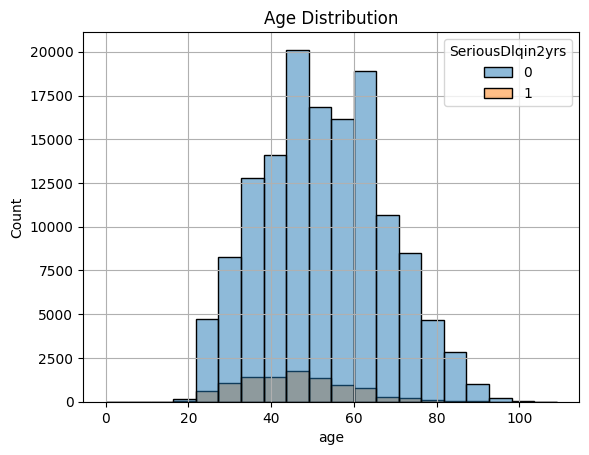

In [10]:
sns.histplot(data=data, x='age', hue='SeriousDlqin2yrs', bins=20)
plt.title('Age Distribution')
plt.grid()
plt.show()

In [11]:
data['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [12]:
data[data['age'] < 21]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


* Распределение возраста нормальное, однако имеется одна строка со значением возраста 0, что кажется абсурдным. Такие значения могут быть в данных из за ошибки при вводе данных или отсутствия информации о возрасте.

### NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate

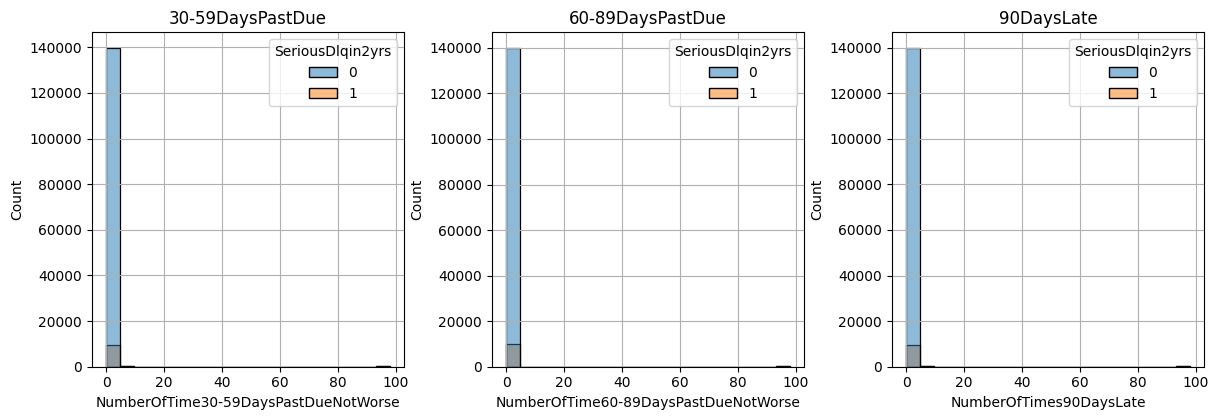

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.histplot(data=data, x='NumberOfTime30-59DaysPastDueNotWorse', hue='SeriousDlqin2yrs', bins=20, ax=axs[0])
axs[0].set_title('30-59DaysPastDue')
axs[0].grid()

sns.histplot(data=data, x='NumberOfTime60-89DaysPastDueNotWorse', hue='SeriousDlqin2yrs', bins=20, ax=axs[1])
axs[1].set_title('60-89DaysPastDue')
axs[1].grid()

sns.histplot(data=data, x='NumberOfTimes90DaysLate', hue='SeriousDlqin2yrs', bins=20, ax=axs[2])
axs[2].set_title('90DaysLate')
axs[2].grid()

plt.tight_layout(pad=0)
plt.show()

In [14]:
data[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,150000.000000,150000.000000,150000.000000
mean,0.421033,0.240387,0.265973
std,4.192781,4.155179,4.169304
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [15]:
data[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].corr()*100

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,100.000000,98.700545,98.360268
NumberOfTime60-89DaysPastDueNotWorse,98.700545,100.000000,99.279618
NumberOfTimes90DaysLate,98.360268,99.279618,100.000000


* Эти три колонки представляют собой один признак, разделенный по разным временным промежуткам. Таким образом, можно увидеть очень похожее распределение данных и очень высокую корреляцию. 75% данных равны 0, а максимальное значение каждого столбца равно 98, что можно было бы рассматривать как выбросы. 

### DebtRatio

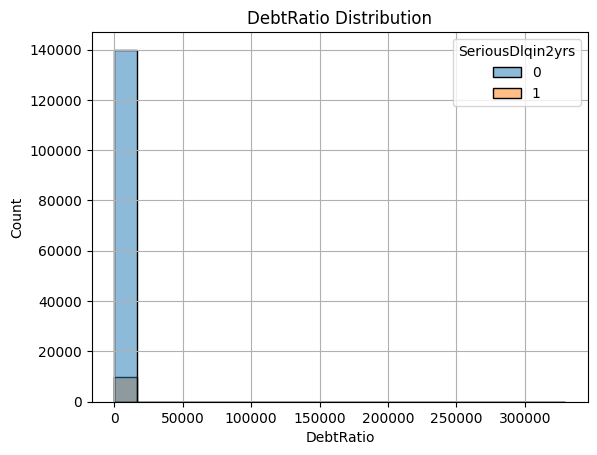

In [16]:
sns.histplot(data=data, x='DebtRatio', hue='SeriousDlqin2yrs', bins=20)
plt.title('DebtRatio Distribution')
plt.grid()
plt.show()

In [17]:
data['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

* Описание признака: ежемесячные выплаты по долгам, алименты, расходы на жизнь, разделенные на месячный валовой доход. В идеале ежемесячный доход должен быть больше, чем ежемесячные расходы, то есть значения признака меньше или равны 1, что верно для большей части значений. Однако максимальное значение в данных составляет 329664, что кажется невозможным, поскольку это означает, что ежемесячные расходы в 330000 раз превышают ежемесячный доход.

### Number Of Open Credit Lines And Loans

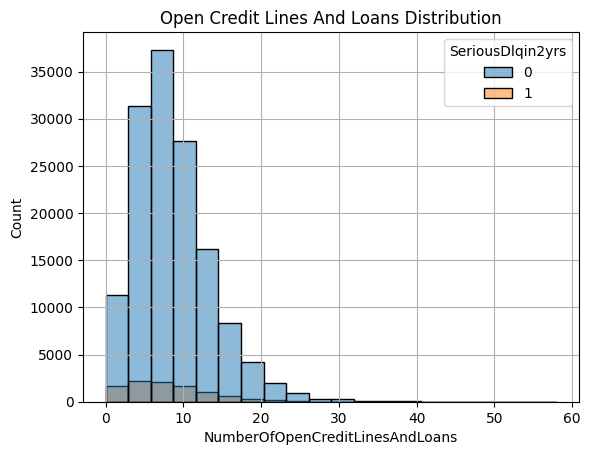

In [18]:
sns.histplot(data=data, x='NumberOfOpenCreditLinesAndLoans', hue='SeriousDlqin2yrs', bins=20)
plt.title('Open Credit Lines And Loans Distribution')
plt.grid()
plt.show()

In [19]:
data['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

### Number Of Dependents

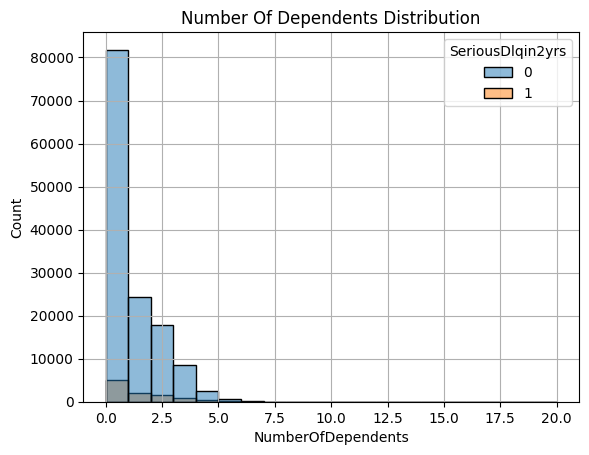

In [20]:
sns.histplot(data=data, x='NumberOfDependents', hue='SeriousDlqin2yrs', bins=20)
plt.title('Number Of Dependents Distribution')
plt.grid()
plt.show()

In [21]:
data['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [22]:
data['NumberOfDependents'].quantile(0.95)

3.0

In [23]:
data['NumberOfDependents'].isna().sum()

3924

* Мы видим, что и здесь есть выбросы. В то время, как 95% значений лежат в пределах 3, максимальное значение признака равно 20, что кажется невозможным.
* В дданных есть пропуски

<Axes: >

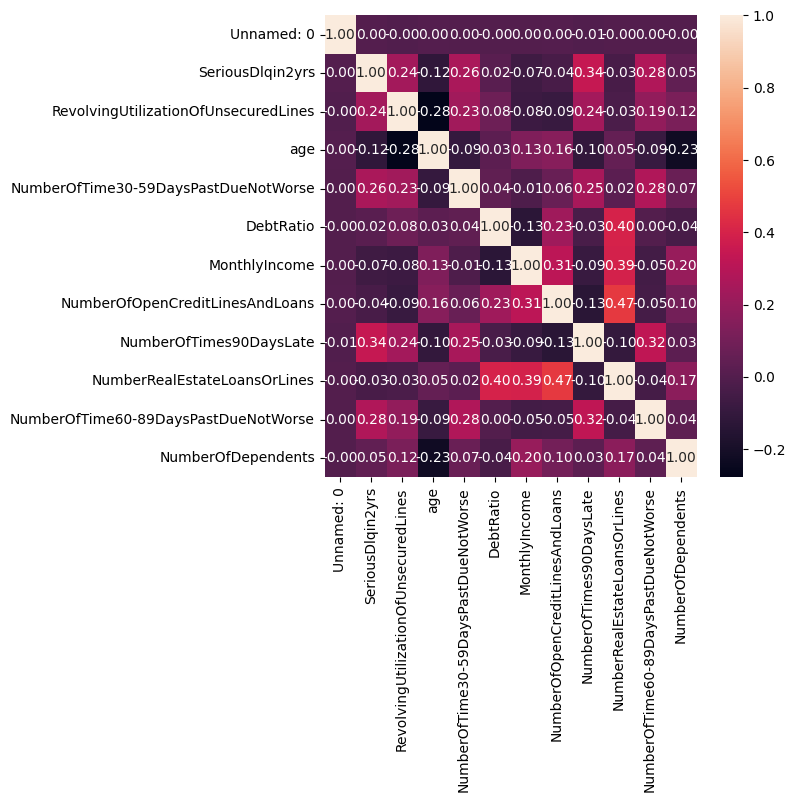

In [24]:
plt.figure(figsize=[6, 6])
sns.heatmap(data.corr(method='spearman'), annot=True, fmt='.2f')

### Дизбаланс классов

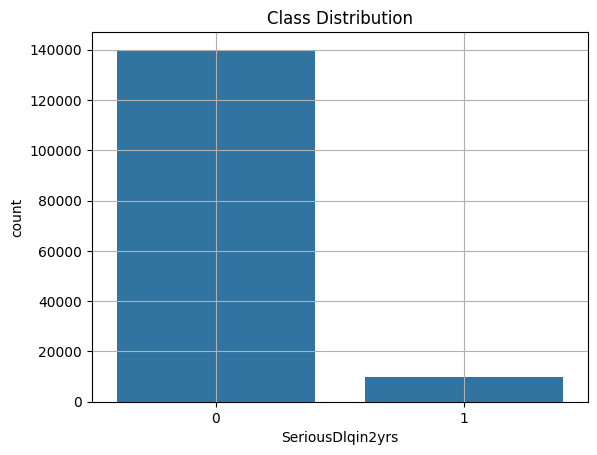

In [25]:
sns.countplot(x='SeriousDlqin2yrs', data=data)
plt.title('Class Distribution')
plt.grid()
plt.show()

* Видим дисбаланс классов. Для работы с данной проблемой мы можем воспользоваться некоторыми инструментами:

  * Ресэмплинг: может включать оверсэмплинг класса меньшинства или андэрсэмплинг класса большинства.
  * Взвешивание классов: многие алгоритмы машинного обучения имеют параметр class_weight. Этот параметр позволяет модели учитывать дисбаланс путем задания большего веса миноритарному классу.
  * Некторые алгоритмы, например основанные на решающих деревьях, могут показывать хорошие результаты на несбалансированных данных
  * Для оценки качества модели лучше не использовать метрику accuracy, а использовать, например, precision, recall или ROC AUC.

### Удаление выбросов

In [98]:
data = data[data['age'] >= 21]

In [121]:
q_unslines = data['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)
q_debt = data['DebtRatio'].quantile(0.95)
q_numdep = data['NumberOfDependents'].quantile(0.999)
q_open_credits = data['NumberOfOpenCreditLinesAndLoans'].quantile(0.99)
q_numtime = data['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.999)

In [122]:
data = data[(data['NumberOfOpenCreditLinesAndLoans'] < q_open_credits) 
        & (data['RevolvingUtilizationOfUnsecuredLines'] < q_unslines) 
        & (data['DebtRatio'] < q_debt)
        & (data['NumberOfDependents'] < q_numdep)
        & (data['NumberOfTime30-59DaysPastDueNotWorse']) < q_numtime]

## Построение моделей

In [123]:
data = data.drop('Unnamed: 0', axis=1)
data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean(), inplace=True)
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(), inplace=True)

In [124]:
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### KNN-модель

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 6)
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5])},
             scoring='accuracy')

In [174]:
optimal_knn = knn_grid.best_estimator_
optimal_knn.fit(X_train, y_train)


knn_probabilities_train = optimal_knn.predict_proba(X_train)[:, 1]
knn_predictions_train = optimal_knn.predict(X_train)
knn_probabilities_test = optimal_knn.predict_proba(X_test)[:, 1]
knn_predictions_test = optimal_knn.predict(X_test)

In [187]:
from sklearn.metrics import roc_auc_score, classification_report

print('ROC AUC KNN-модели на обучающей выборке: ',roc_auc_score(y_train, knn_probabilities_train))
print('ROC AUC KNN-модели на тестовой выборке: ',roc_auc_score(y_test, knn_probabilities_test))

ROC AUC KNN-модели на обучающей выборке:  0.9572321588406455
ROC AUC KNN-модели на тестовой выборке:  0.6693899288847587


In [177]:
print(classification_report(y_test,knn_predictions_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.47      0.08      0.14      1956

    accuracy                           0.93     30000
   macro avg       0.70      0.54      0.55     30000
weighted avg       0.91      0.93      0.91     30000



### Логистическая регрессия

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_log = LogisticRegression(class_weight='balanced')

param_grid = {
    'C': [100, 10, 1, 0.1, 0.01],
    'penalty': ['l1', 'l2'],
}

log_grid = GridSearchCV(model_log, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

log_grid.fit(X, y)

C:\Users\aygul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aygul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aygul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aygul\AppDat

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [207]:
print(f"  Лучший набор гиперпараметров: {log_grid.best_params_}")

  Лучший набор гиперпараметров: {'C': 0.01, 'penalty': 'l2'}


In [208]:
log_reg = search.best_estimator_
log_reg.fit(X_train, y_train)


log_probabilities_train = log_reg.predict_proba(X_train)[:, 1]
log_probabilities_test = log_reg.predict_proba(X_test)[:, 1]
log_predictions_test = log_reg.predict(X_test)

In [209]:
print('ROC AUC логистической регрессии на обучающей выборке: ',roc_auc_score(y_train, log_probabilities_train))
print('ROC AUC логистической регрессии на тестовой выборке: ',roc_auc_score(y_test, log_probabilities_test))

ROC AUC логистической регрессии на обучающей выборке:  0.791469172569907
ROC AUC логистической регрессии на тестовой выборке:  0.7899622168377534


In [210]:
print(classification_report(y_test,log_predictions_test))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     28044
           1       0.17      0.65      0.27      1956

    accuracy                           0.77     30000
   macro avg       0.57      0.72      0.57     30000
weighted avg       0.92      0.77      0.83     30000



### Градиентный бустинг

In [194]:
import xgboost as xgb

scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

params = {
    'objective': ['binary:logistic'],
    'eta': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1]
}
model_xgb = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)

xgb_grid = GridSearchCV(model_xgb, params, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

xgb_grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'objective': ['binary:logistic'],
                         'subsample': [0.8, 0.9, 1]},
             scoring='roc_auc')

In [211]:
xgb = xgb_grid.best_estimator_

xgb.fit(X_train, y_train)

xgb_probabilities_test = xgb.predict_proba(X_test)[:, 1]
xgb_predictions_test = xgb.predict(X_test)
xgb_probabilities_train = xgb.predict_proba(X_train)[:, 1]

In [212]:
print('ROC AUC XGBoost модели на обучающей выборке: ',roc_auc_score(y_train, xgb_probabilities_train))
print('ROC AUC XGBoost модели на тестовой выборке: ',roc_auc_score(y_test, xgb_probabilities_test))

ROC AUC XGBoost модели на обучающей выборке:  0.8768419183701621
ROC AUC XGBoost модели на тестовой выборке:  0.865028086159669


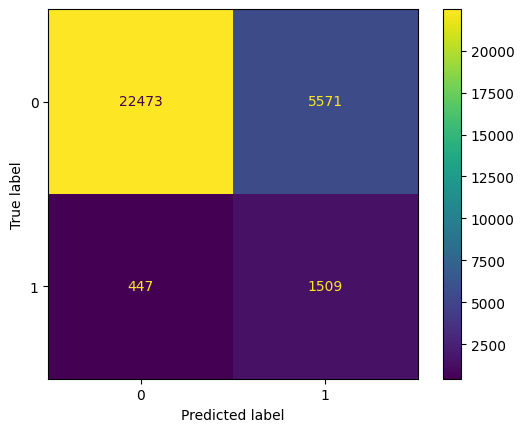

In [216]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, xgb_predictions_test)

In [214]:
print(classification_report(y_test,xgb_predictions_test))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     28044
           1       0.21      0.77      0.33      1956

    accuracy                           0.80     30000
   macro avg       0.60      0.79      0.61     30000
weighted avg       0.93      0.80      0.85     30000



## Выводы

* Модель KNN очень хорошо предсказывает класс 0, однако показывает плохие результаты на объектах класса 1 (recall = 0.08). То есть может для плохих заемщиков ложно предсказать, что человек не просрочит выплату.
* Логистическая регрессия справляется с объектами класса 1 лучше, а также показывает лучшие метрики ROC AUC: на обучающей и на тестовой выборках - 0.79.
* Лучшая модель, которую и смогла получить - модель градиентного бустинга XGBoost, с показателями ROC AUC на обучающей выборке 0.88 и на обучающей 0.87 